In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Training data

In [4]:
df = pd.read_csv('/Users/bryanburzon/School/DS207/mids-207-final-project-summer23-Burzon-Brown-Caldera-Gomez/icr-identify-age-related-conditions/greeks.csv')
df.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


# Cleaning tasks

## 1.  Replace "Uknown" to na in epsilon column 

In [ ]:
df['column_name'].replace('unknown', np.nan, inplace=True)

# EDA

### Data Types

In [5]:
df.dtypes

Id         object
Alpha      object
Beta       object
Gamma      object
Delta      object
Epsilon    object
dtype: object

### Shape

In [6]:
df.shape

(617, 6)

### Columns 

In [7]:
columns = df.columns.tolist()
columns

['Id', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']

### Initial Summary Stat of each column 

In [8]:
df.describe()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
count,617,617,617,617,617,617
unique,617,4,3,8,4,198
top,000ff2bfdfe9,A,C,M,B,Unknown
freq,1,509,407,445,456,144


### Count NA

In [9]:
col_with_NA = df.isna().sum() > 0
col_with_NA[col_with_NA ==True]

#col_with_NA.index.to_list()
na_col = col_with_NA[col_with_NA ==True].index.to_list()

df[na_col].isna().sum()

Series([], dtype: float64)

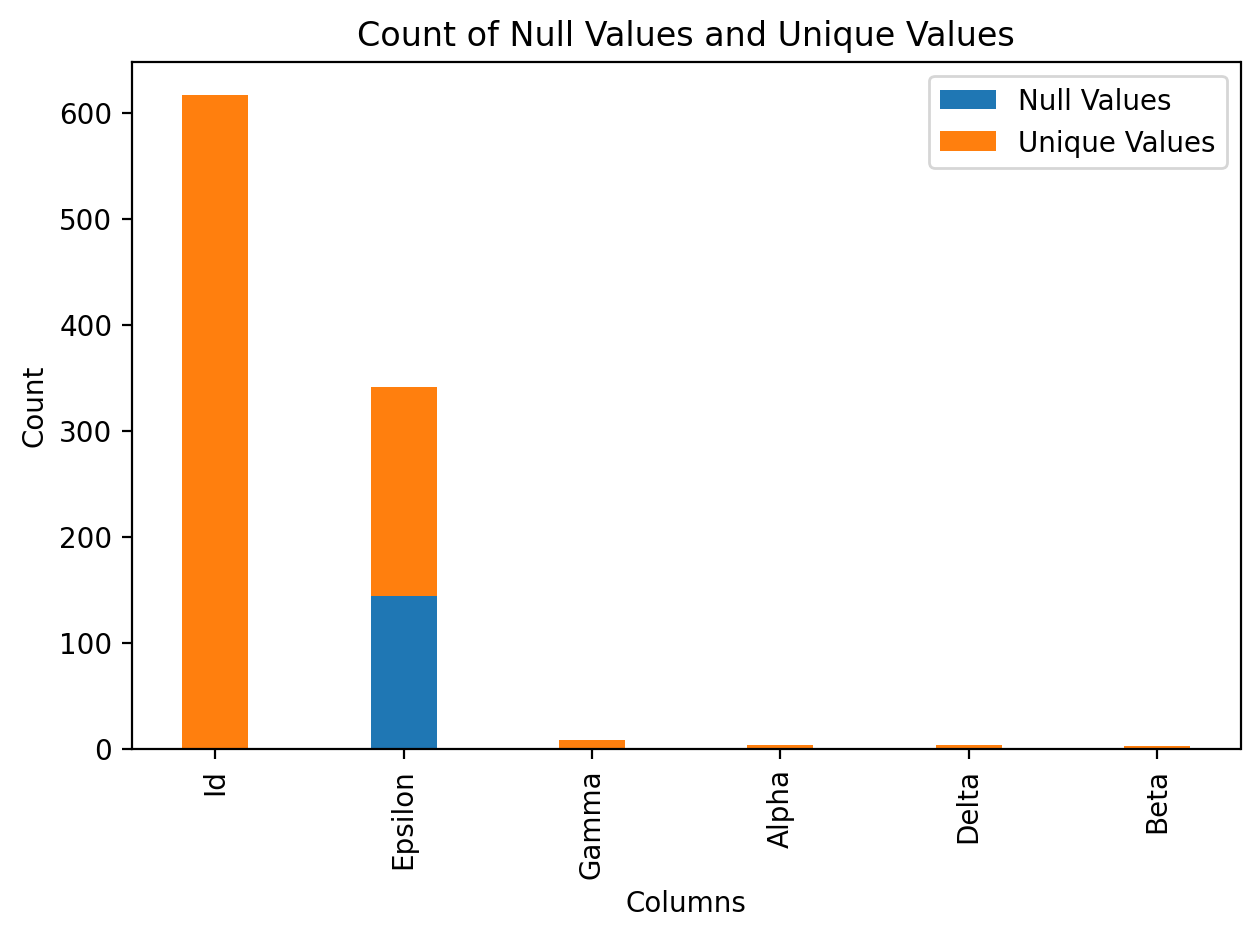

In [22]:
# Assuming you have a dataframe named 'df'
# Create a list to store the column names
columns = df.columns.tolist()

# Create empty lists to store the counts
null_counts = []
unique_counts = []

# Iterate through each column in the dataframe
for column in columns:
    null_count = df[column].isnull().sum()  # Count the number of null values in the column
    unique_count = df[column].nunique()  # Count the number of unique values in the column
    
    null_counts.append(null_count)
    unique_counts.append(unique_count)

columns, null_counts, unique_counts = zip(*sorted(zip(columns, null_counts, unique_counts), key=lambda x: x[2], reverse=True))


# Plotting the stacked bar chart
x = range(len(columns))  # X-axis values
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
ax.bar(x, null_counts, width, label='Null Values')
ax.bar(x, unique_counts, width, bottom=null_counts, label='Unique Values')

ax.set_ylabel('Count')
ax.set_xlabel('Columns')
ax.set_title('Count of Null Values and Unique Values')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [21]:
for column in df.columns:
    unique_count = df[column].nunique()  # Count the number of unique values in the column
    null_count = df[column].isnull().sum()
    print(f"Column '{column}' has {unique_count} unique value(s) and has {null_count} null value(s).")

Column 'Id' has 617 unique value(s) and has 0 null value(s).
Column 'Alpha' has 4 unique value(s) and has 0 null value(s).
Column 'Beta' has 3 unique value(s) and has 0 null value(s).
Column 'Gamma' has 8 unique value(s) and has 0 null value(s).
Column 'Delta' has 4 unique value(s) and has 0 null value(s).
Column 'Epsilon' has 197 unique value(s) and has 144 null value(s).


In [20]:
df['Beta'].unique()

144

### Correlation 

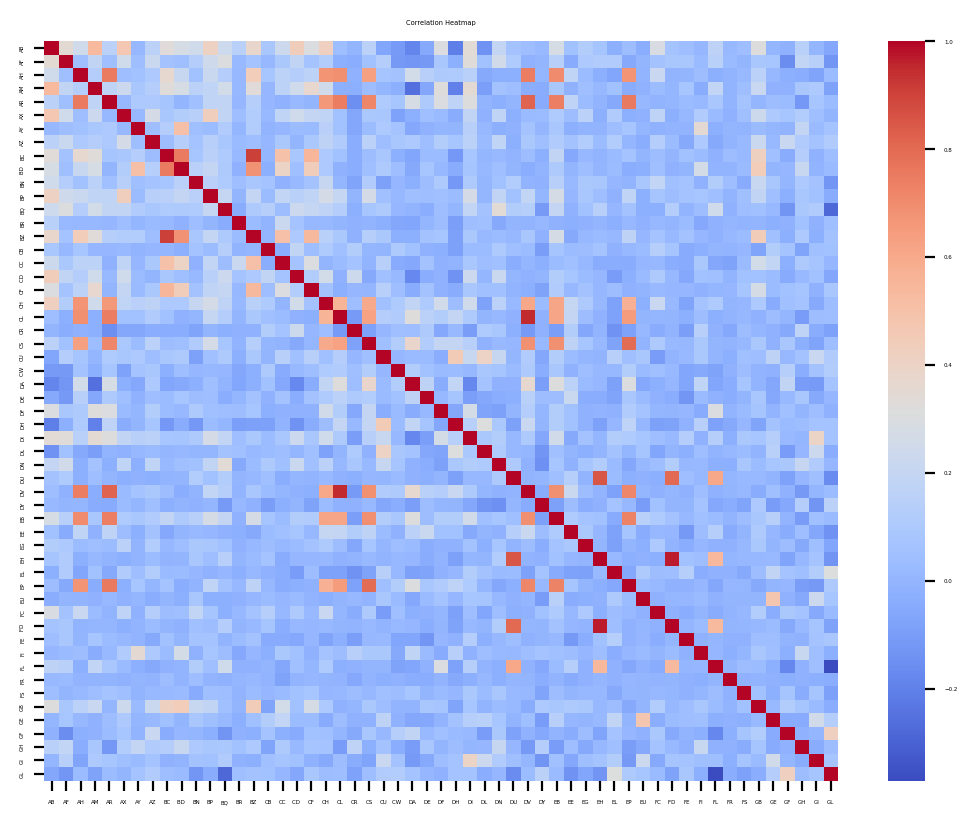

In [64]:
df_without_EJ_class =df.drop('EJ', axis=1)
df_without_EJ_class = df_without_EJ_class.drop('Class', axis=1)

coor_matrix = df_without_EJ_class.iloc[:,1:].corr()

sns.heatmap(coor_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.rcParams['font.size'] = 2
plt.title('Correlation Heatmap')
plt.show()

